In [27]:
#加载所有常用模块
from pyforest import *
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("F:/data/survey.csv")

<IPython.core.display.Javascript object>

In [3]:
data.head()

,num,1A,2B_1,2B_2,2B_3,2B_4,3C_1,3C_2,3C_3,3C_4,...,14N_2,15O,16P_1,16P_2,16P_3,16P_4,16P_5,16P_6,16P_7,17Q
0,1,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,4
1,2,3,0,0,1,0,1,0,0,0,...,1,1,1,0,0,0,0,0,0,1
2,3,2,0,1,0,0,1,0,0,0,...,0,4,1,1,0,1,0,0,1,4
3,4,1,0,1,0,0,1,0,0,0,...,1,3,1,1,0,1,1,0,0,3
4,5,3,0,0,0,1,0,0,0,1,...,1,3,1,0,0,0,1,0,1,2


In [4]:
data['4D'].value_counts() #对分类变量的类别进行计数

1    115
2     88
4     35
3     33
Name: 4D, dtype: int64

## 归一化

In [19]:
data=pd.read_csv("F:/data/survey.csv")

<IPython.core.display.Javascript object>

In [20]:
#归一化
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler()  
data_minMax = min_max_scaler.fit_transform(data)  
data = pd.DataFrame(data_minMax) #数值转化为数据框
data.head()

<IPython.core.display.Javascript object>

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.000000
1,0.666667,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.333333,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.8,1.0,0.6,1.0,1.0,0.0,1.0,0.0,0.0,1.000000
3,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,...,0.8,0.0,0.4,1.0,1.0,0.0,1.0,1.0,0.0,0.666667
4,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.333333,...,0.6,0.0,0.4,1.0,0.0,0.0,0.0,1.0,0.0,0.333333


In [21]:
data.to_csv("F:/data/normalized.csv",index=False)#转换成csv文件


## 假设检验

In [8]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm

In [9]:
data=pd.read_csv("F:/data/hypothetical_test.csv",encoding='gbk')
data

,留学,未留学
0,3,1
1,1,3
2,3,3
3,6,3
4,6,1
5,4,2
6,5,5
7,6,5
8,6,3
9,3,1


In [10]:
sm.stats.ttost_paired(data['留学'],data['未留学'],-0,0)

(0.9853449433930984,
 (2.5879865568825218, 0.014655056606901522, 9.0),
 (2.5879865568825218, 0.9853449433930984, 9.0))


## 方差分析

In [11]:
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from matplotlib.font_manager import FontProperties

In [16]:
data=pd.read_csv("F:/data/variance_analysis.csv",encoding='gbk')

In [28]:
data.head()

,学历,从业领域,职位,城市类型,收入
0,研究生,传统媒体转型新媒体,其他,一线城市,3000
1,大专,传统媒体转型新媒体,自媒体人,三线城市,3000
2,大专,纯互联网人,新媒体编辑,二线城市,3000
3,本科,传统行业,其他,四线城市,3000
4,本科,纯互联网人,自媒体人,三线城市,3000


In [19]:
data['学历'] = data['学历'].astype('category')
data['学历'].cat.categories=['中专', '大专', '本科', '研究生', '硕导/博导']

In [21]:
data['从业领域'] = data['从业领域'].astype('category')
data['从业领域'].cat.categories=['传统行业', '纯互联网人','传统行业转型互联网', '传统媒体转型新媒体']

In [27]:
data['职位'] = data['职位'].astype('category')
data['职位'].cat.categories=['新媒体编辑', '新媒体经理', '新媒体总监', '自媒体人', '其他', 'CXO级别领导']

In [23]:
data['城市类型'] = data['城市类型'].astype('category')
data['城市类型'].cat.categories=['一线城市', '二线城市', '三线城市', '四线城市']

In [43]:
formula = '收入 ~ C(学历) * C(从业领域)+C(职位) * C(城市类型)+C(学历) * C(职位)+C(学历) * C(城市类型)+C(从业领域) * C(职位)+C(从业领域) * C(城市类型)+C(职位) * C(城市类型)'
data_anova_inter = sm.stats.anova_lm(smf.ols(formula, data = data).fit())  # dc_sales_est 是一个模型对象
print(data_anova_inter)

                    df        sum_sq       mean_sq          F        PR(>F)
C(学历)              4.0  3.977332e+08  9.943331e+07  11.772515  1.397123e-08
C(从业领域)            3.0  9.087259e+07  3.029086e+07   3.586320  1.477432e-02
C(职位)              5.0  9.623935e+08  1.924787e+08  22.788728  5.801124e-18
C(城市类型)            3.0  1.991492e+08  6.638305e+07   7.859494  5.625898e-05
C(学历):C(从业领域)     12.0  8.538585e+07  7.115488e+06   0.842446  6.066457e-01
C(职位):C(城市类型)     15.0  1.300774e+08  8.671826e+06   1.026710  4.293420e-01
C(学历):C(职位)       20.0  2.190073e+08  1.095037e+07   1.296481  1.849616e-01
C(学历):C(城市类型)     12.0  1.991034e+08  1.659195e+07   1.964423  2.936685e-02
C(从业领域):C(职位)     15.0  3.326751e+07  2.217834e+06   0.262583  9.976416e-01
C(从业领域):C(城市类型)    9.0  8.984503e+07  9.982781e+06   1.181922  3.084830e-01
Residual         194.0  1.638568e+09  8.446224e+06        NaN           NaN


In [59]:
from statsmodels.graphics.api import interaction_plot

In [62]:
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] =False #减号unicode编码

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

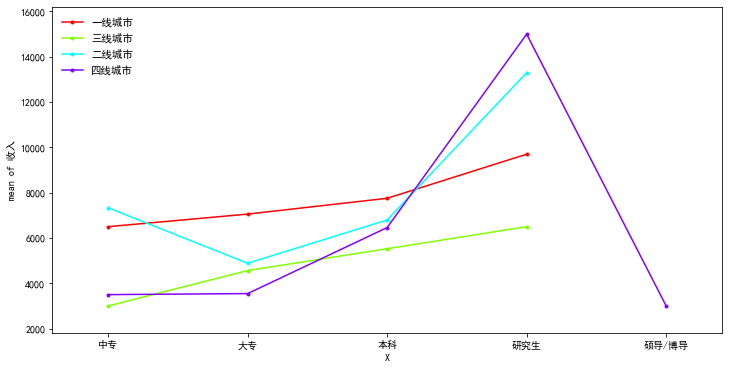

In [63]:
plt.figure(figsize=(12,6))
fig=interaction_plot(np.array(data['学历']),np.array(data['城市类型']),data['收入'],ax=plt.gca())
fig_adj=plt.subplot(111)
plt.legend(prop={'family':'SimHei','size':10.5},loc='upper left',frameon=False)


## 列联表分析

In [8]:
data=pd.read_csv("F:/data/table.csv",encoding='gbk')
data

<IPython.core.display.Javascript object>

,小于3000,3001-5000,5001-8000,8001-10000,10001-15000,15001以上,All
0,30,40,49,15,15,6,155
1,29,19,29,13,7,19,116
2,59,59,78,28,22,25,271


In [9]:
from scipy.stats import contingency

In [10]:
pd.DataFrame(contingency.expected_freq(data),columns=data.columns,index=data.index)

<IPython.core.display.Javascript object>

,小于3000,3001-5000,5001-8000,8001-10000,10001-15000,15001以上,All
0,33.745387,33.745387,44.612546,16.01476,12.583026,14.298893,155.0
1,25.254613,25.254613,33.387454,11.98524,9.416974,10.701107,116.0
2,59.000000,59.000000,78.000000,28.00000,22.000000,25.000000,271.0



## 熵权法

In [15]:
import numpy as np
import pandas as pd
data=pd.read_csv("F:/data/evaluation.csv")
m,n=data.shape

In [49]:
data=data.as_matrix(columns=None)
#将dataframe格式转化为matrix格式

In [50]:
k=1/np.log(m)
yij=data.sum(axis=0)
pij=data/yij

In [51]:
#第二步，计算pij
test=pij*np.log(pij)
test=np.nan_to_num(test)
ej=-k*(test.sum(axis=0))

In [52]:
#计算每种指标的信息熵
wi=(1-ej)/np.sum(1-ej)
#计算每种指标的权重

In [53]:
wi

array([0.08934259, 0.22297855, 0.12912355, 0.03003693, 0.15875222,
       0.21458149, 0.15518467])

In [20]:
#使用小提琴图研究下得分的分布情况
data=pd.read_csv("F:/data/hist.csv")

<IPython.core.display.Javascript object>

In [22]:
x=data['leibie']
y=data['score']

<IPython.core.display.Javascript object>

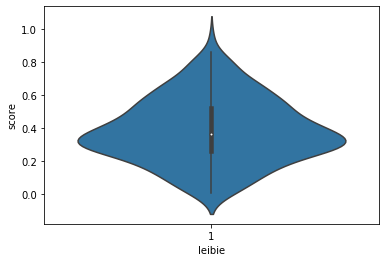

In [23]:
sns.violinplot(x=x,y=y,data=data) #在sns.violinplot中，x是类别变量，y是数值型变量，data用于指定数据集


## 决策树

In [90]:
data=pd.read_csv("F:/data/classifier2.csv")

In [91]:
X = data.drop(['Y'],axis=1) #从数据集中删除目标变量
y = data["Y"]

In [92]:
from sklearn.tree import DecisionTreeClassifier#导入决策树算法
from sklearn import tree#导入一棵树
import graphviz
from sklearn.tree import export_graphviz

In [93]:
model = DecisionTreeClassifier(max_depth=4,criterion="entropy")#实例化
model.fit(X,y)#模型的训练

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [94]:
#预测每个类别的概率，这是叶子中相同类别的训练样本的分数
result=model.predict_proba(X)
result = pd.DataFrame(result)
result.head()

,0,1
0,0.500000,0.500000
1,0.485437,0.514563
2,0.485437,0.514563
3,0.485437,0.514563
4,0.181818,0.818182


In [99]:
result.columns = ["no","yes"]

<IPython.core.display.Javascript object>

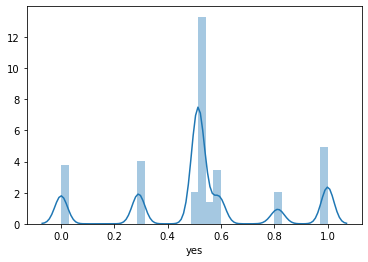

In [102]:
#绘制概率密度图
sns.distplot(result['yes'])
plt.show()

In [95]:
dot_data = tree.export_graphviz(model, out_file=None,##算法，
                                max_depth=4,#最大深度
                                feature_names=data.columns[:-1],  #特征名
                                class_names=['No', 'Yes'],  #标签名
                                filled=True,#填充颜色
                                rounded=True, #光滑一点
#                                 special_characters=True
                               )

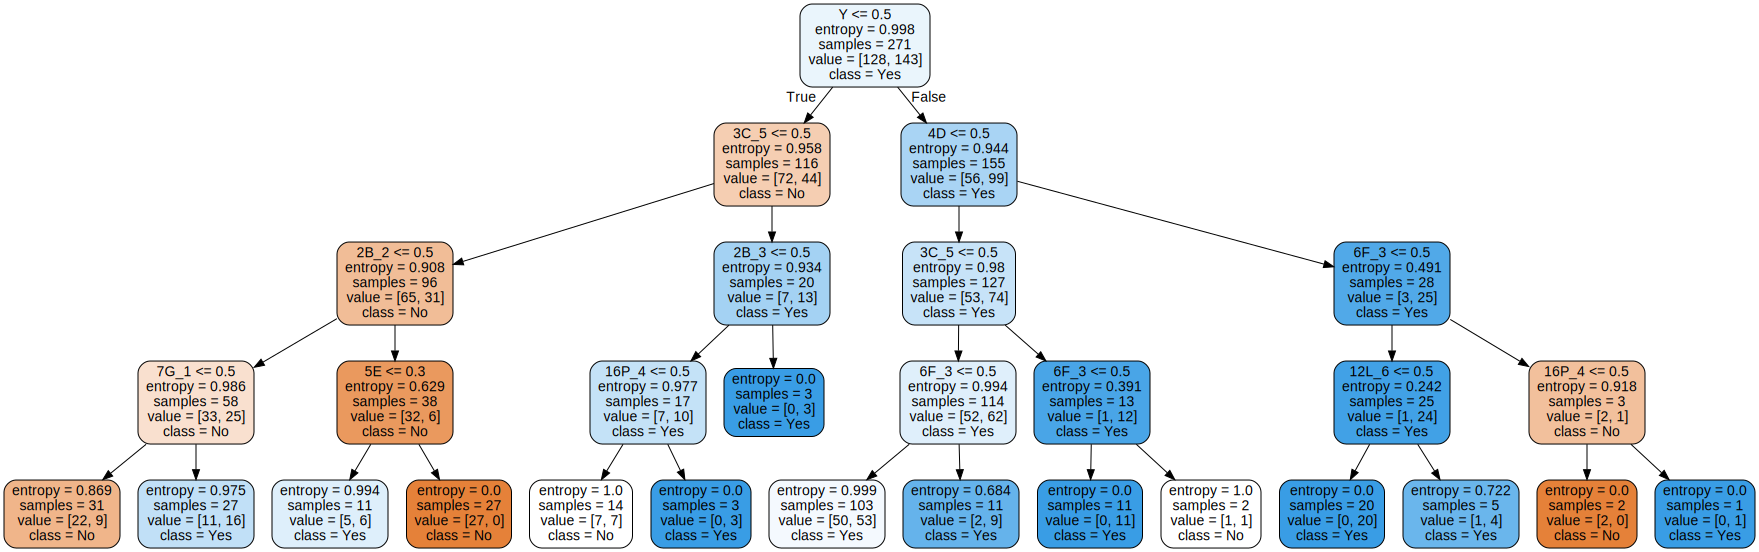

In [96]:
data=data.values #数据框转数组
graph = graphviz.Source(dot_data)
graph

In [97]:
#将决策树图导出为pdf
graph.render('example.gv', directory='F:\data', view=True)
print('Save example.gv file!\n')

Save example.gv file!



## 随机森林

In [2]:
#加载需要的模块
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

In [10]:
data=pd.read_csv("F:/data/classifier.csv")
data['Y'].value_counts()

1    155
0    116
Name: Y, dtype: int64

In [11]:
X = data.drop(['Y'],axis=1) #从数据集中删除目标变量
y = data["Y"]

In [12]:
#过采样
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state=0)
X_resampled, y_resampled = cc.fit_sample(X, y)
X.shape,y.shape

((271, 36), (271,))

In [13]:
#基于随机森林度量各个变量的重要性
clf = RandomForestClassifier()
clf = clf.fit(X,y)
c=clf.feature_importances_
c

array([0.04936105, 0.01647231, 0.02550162, 0.02277285, 0.02740455,
       0.01660002, 0.00657854, 0.01960501, 0.0183273 , 0.06169274,
       0.07172702, 0.02289302, 0.02325084, 0.0164309 , 0.01816274,
       0.01716025, 0.04186859, 0.0049936 , 0.05669458, 0.01826953,
       0.0214093 , 0.01609198, 0.02574574, 0.02692081, 0.02553177,
       0.02116863, 0.06602751, 0.02987517, 0.05179086, 0.02075211,
       0.0224509 , 0.01112436, 0.02480414, 0.02187065, 0.01633978,
       0.04232922])

In [14]:
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(c)[::-1]

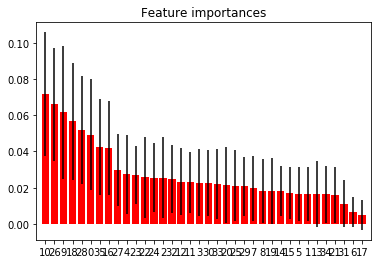

In [15]:
#对变量重要性画图，并依次降序排列
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), c[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [16]:
X.columns #这里通过显示列名，便于后面对照特征编号对应的特征名,注意图片中是从0开始编号

Index(['1A', '2B_1', '2B_2', '2B_3', '3C_1', '3C_2', '3C_3', '3C_4', '3C_5',
       '4D', '5E', '6F_1', '6F_2', '6F_3', '7G_1', '7G_2', '8H', '9I_1',
       '10J_1', '12L_1', '12L_2', '12L_3', '12L_4', '12L_5', '12L_6', '12L_7',
       '13M', '14N_1', '15O', '16P_1', '16P_2', '16P_3', '16P_4', '16P_5',
       '16P_6', '17Q'],
      dtype='object')


## 主题模型

In [26]:
from gensim import corpora, models, similarities
import gensim
import numpy as np
import pandas as pd
import re

In [19]:
data=pd.read_csv("F:/data/xuanci.csv",encoding='gbk')

In [20]:
data.head()

,标签词
0,实用
1,媒体
2,运营
3,营销
4,案例


In [22]:
data=data.drop_duplicates(['标签词']) #数据去重

In [28]:
data = np.array(data) #dataframe转array

In [32]:
dictionary = corpora.Dictionary(data)
corpus = [dictionary.doc2bow(text) for text in data]

In [33]:
lda = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, num_topics=20)
lda.print_topic(10, topn=5)

'0.228*"数据" + 0.228*"策划" + 0.011*"实用" + 0.011*"方法论" + 0.011*"写作技巧"'

In [38]:
lda.print_topics(num_topics=5,num_words =5)

[(6, '0.228*"案例" + 0.228*"技巧" + 0.011*"策划" + 0.011*"实操" + 0.011*"文案"'),
 (16, '0.292*"研究" + 0.014*"实操" + 0.014*"应用" + 0.014*"推广" + 0.014*"写作技巧"'),
 (14, '0.187*"教程" + 0.187*"产品" + 0.187*"运用" + 0.009*"用户" + 0.009*"数据"'),
 (10, '0.228*"数据" + 0.228*"策划" + 0.011*"实用" + 0.011*"方法论" + 0.011*"写作技巧"'),
 (3, '0.292*"实战经验" + 0.014*"研究" + 0.014*"运用" + 0.014*"新手" + 0.014*"实操"')]